In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\chenh\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5


In [3]:
df = pd.read_csv("C:/Users/chenh/Desktop/nus_data_science_course/Week 18/netflix_titles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df_sort = df.copy()
df_sort = df_sort[['show_id', 'type', 'title', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']]
df_sort['country'] = df_sort['country'].fillna("Unspecific")
df_sort.dropna(inplace = True)
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 686.7+ KB


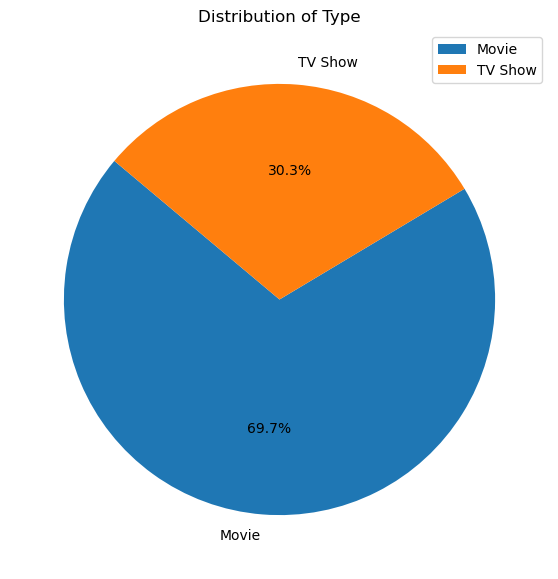

In [5]:
df_sort["type"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(7, 7), startangle=140, legend = True)
plt.title("Distribution of Type")
plt.ylabel("")  
plt.xlabel("")
plt.show()

In [6]:
df_country = df_sort["country"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).reset_index()
df_country.columns = ["index", "country"]

country_counts = df_country["country"].value_counts().reset_index()
country_counts.columns = ["country", "count"]
country_counts["country"] = country_counts["country"].replace("United States", "United States of America")

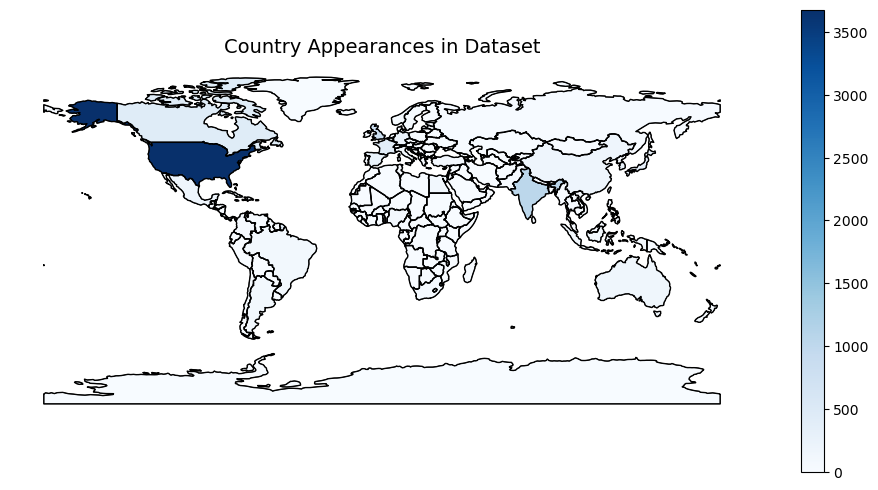

In [7]:
world = gpd.read_file('C:/Users/chenh/Desktop/nus_data_science_course/Week 18/map/ne_110m_admin_0_countries.shp')
world_map = world.merge(country_counts, how="left", left_on="ADMIN", right_on="country")
world_map["count"] = world_map["count"].fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
world.boundary.plot(ax=ax, linewidth=1, color="black")
world_map.plot(column="count", cmap="Blues", linewidth=0.5, edgecolor="black", legend=True, ax=ax)
plt.title("Country Appearances in Dataset", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

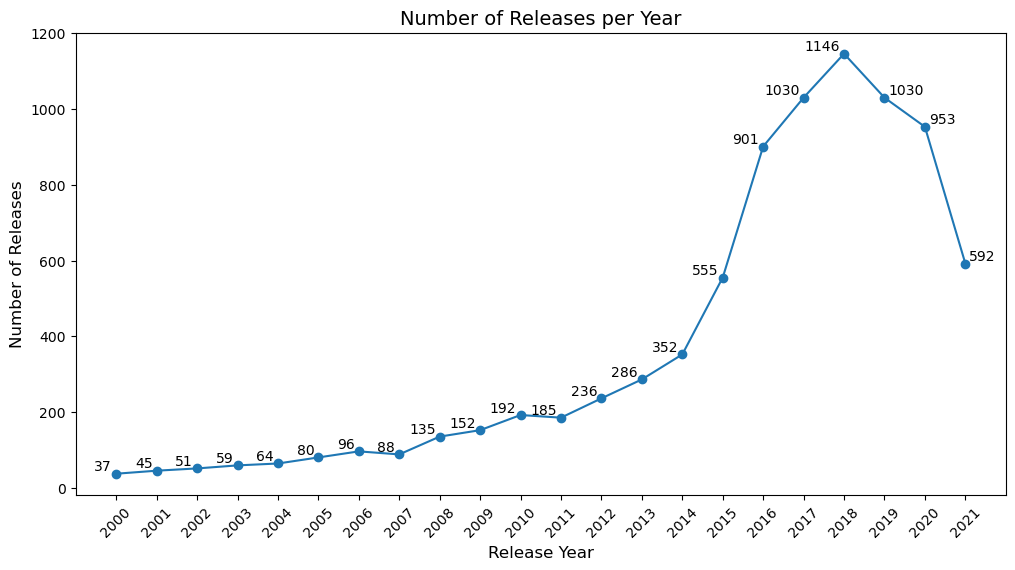

In [8]:
release_count = df_sort['release_year'][df_sort['release_year'] >= 2000].value_counts().sort_index()

plt.figure(figsize=(12, 6))
release_count.plot(kind = 'line', marker = "o")

for x, y in zip(release_count.index, release_count.values):
    if x >= 2019:
        plt.text(x + 0.1, y, str(y), fontsize=10, ha="left", va="bottom")  # Shift left
    else:
        plt.text(x - 0.1, y, str(y), fontsize=10, ha="right", va="bottom")  # Shift left

plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Releases", fontsize=12)
plt.xlim(1999, release_count.index.max() + 1)
plt.xticks(ticks=release_count.index, fontsize=10, rotation=45)
plt.title("Number of Releases per Year", fontsize=14)

plt.show()

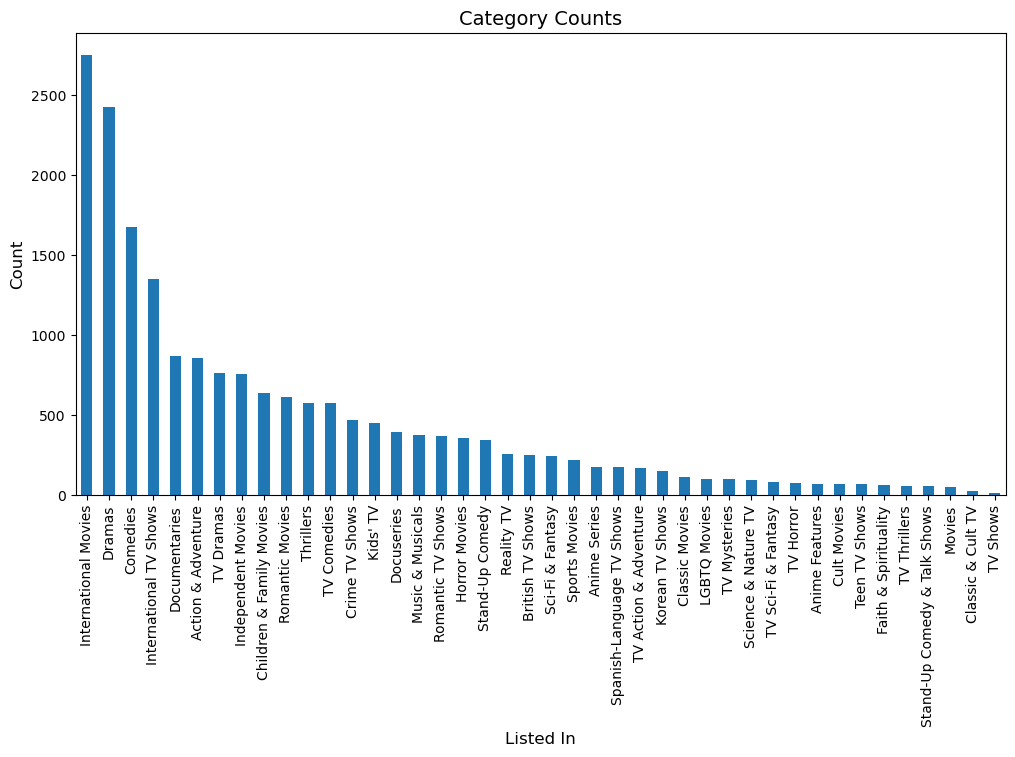

In [9]:
df_listed_in = df_sort["listed_in"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).reset_index()
df_listed_in.columns = ["index", "listed_in"]

listed_in_counts = df_listed_in["listed_in"].value_counts().reset_index()
listed_in_counts.columns = ["listed_in", "count"]
listed_in_counts = listed_in_counts.set_index("listed_in")

listed_in_counts.plot(kind="bar", figsize=(12, 6), legend = False)
plt.xlabel("Listed In", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.title("Category Counts", fontsize=14)

plt.show()

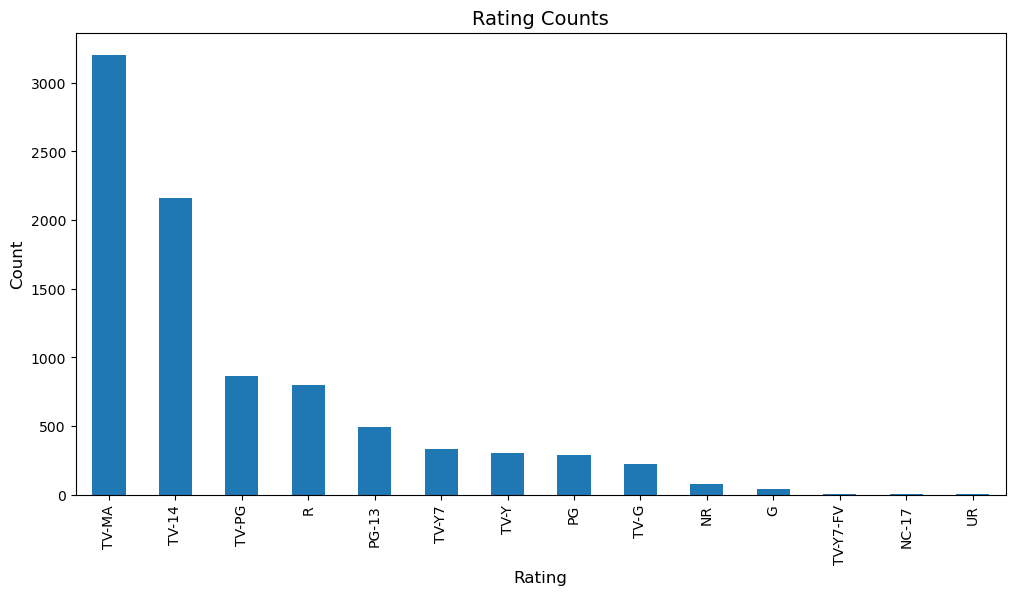

In [10]:
rating_counts = df_sort["rating"].value_counts().reset_index()
rating_counts.columns = ["rating", "count"]
rating_counts = rating_counts.set_index("rating")

rating_counts.plot(kind="bar", figsize=(12, 6), legend = False)
plt.xlabel("Rating", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.title("Rating Counts", fontsize=14)

plt.show()

In [11]:
df_director = df.dropna(subset = ['director'])
df_director = df_director["director"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).reset_index()
df_director.columns = ["index", "director"]

director_counts = df_director["director"].value_counts().reset_index()
director_counts.columns = ["director", "count"]
director_counts = director_counts.set_index("director")

top_20_directors = director_counts.head(20)

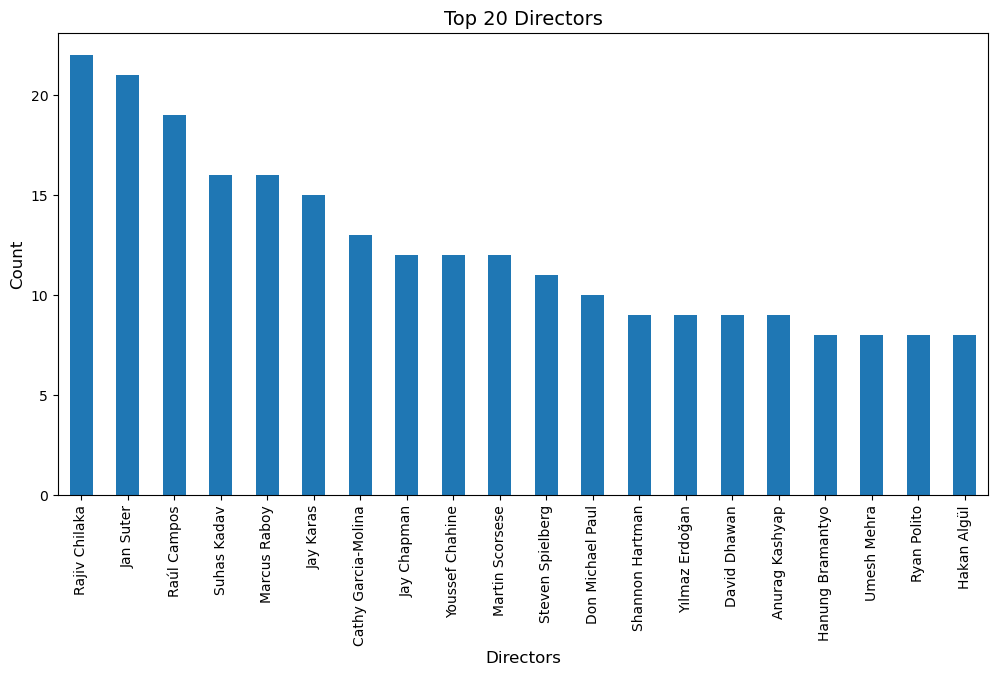

In [12]:
top_20_directors.plot(kind="bar", figsize=(12, 6), legend = False)
plt.xlabel("Directors", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.title("Top 20 Directors", fontsize=14)

plt.show()